In [5]:
import os 

os.getcwd()

os.chdir('/Volumes/scratch/DIMA/chiodin/repositories/image_registration_pipeline')

In [7]:
import matplotlib.pyplot as plt
def show_image(image):
    plt.imshow(image, cmap='Reds')
    plt.show()

In [6]:
import argparse
import os 
import pandas as pd
import logging
from skimage.io import imread 
from utils.image_cropping import estimate_overlap
from utils.image_cropping import crop_2d_array_grid
from utils.wrappers.create_checkpoint_dirs import create_checkpoint_dirs
from utils.wrappers.compute_mappings import compute_mappings
from utils.wrappers.apply_mappings import apply_mappings
from utils.wrappers.export_image import export_image
from utils.empty_folder import empty_folder



def register_images(input_path, output_path, fixed_image_path, 
                    mappings_dir, registered_crops_dir,  
                    crop_width_x, crop_width_y, overlap_x, overlap_y, 
                    auto_overlap, overlap_factor, delete_checkpoints):
    fixed_image = imread(fixed_image_path)
    moving_image = imread(input_path)
    
    if auto_overlap:
        overlap_x, overlap_y = estimate_overlap(fixed_image, moving_image, overlap_factor=overlap_factor)

    fixed_crops = crop_2d_array_grid(fixed_image, crop_width_x, crop_width_y, overlap_x, overlap_y)
    moving_crops = crop_2d_array_grid(moving_image, crop_width_x, crop_width_y, overlap_x, overlap_y)

    current_mappings_dir, current_registered_crops_dir = create_checkpoint_dirs(mappings_dir, registered_crops_dir, input_path)
    mappings = compute_mappings(fixed_crops=fixed_crops, moving_crops=moving_crops, checkpoint_dir=current_mappings_dir)
    registered_crops = apply_mappings(mappings=mappings, moving_crops=moving_crops, checkpoint_dir=current_registered_crops_dir)
    export_image(registered_crops, overlap_x, overlap_y, output_path)

    if delete_checkpoints:
        empty_folder(current_mappings_dir)
        empty_folder(current_registered_crops_dir)

ModuleNotFoundError: No module named 'utils.image_cropping'

In [2]:
input_path="/Volumes/scratch/DIMA/chiodin/tests/img_reg_pipeline_3/data/output/image_conversion/2024.09.01_DAPI_p53_CD3/785R1_DAPI_p53_CD3.ome.tiff"
output_path="/Volumes/scratch/DIMA/chiodin/tests/img_reg_pipeline_3/data/output/image_registration/2024.09.01_DAPI_p53_CD3/785R1_DAPI_p53_CD3.ome.tiff"
fixed_image_path="/Volumes/scratch/DIMA/chiodin/tests/img_reg_pipeline_3/data/output/image_conversion/2024.08.30_DAPI_PPARgamma_PDL1/785R1_DAPI_PPARgamma_PDL1.ome.tiff"
mappings_dir="/Volumes/scratch/DIMA/chiodin/tests/img_reg_pipeline_3/data/mappings" 
registered_crops_dir="/Volumes/scratch/DIMA/chiodin/tests/img_reg_pipeline_3/data/registered_crops"  
crop_width_x=900 
crop_width_y=900 
overlap_x=300
overlap_y=300 
auto_overlap=False
overlap_factor=0.3 
delete_checkpoints=False

register_images(input_path, output_path, fixed_image_path, 
                    mappings_dir, registered_crops_dir,  
                    crop_width_x, crop_width_y, overlap_x, overlap_y, 
                    auto_overlap, overlap_factor, delete_checkpoints)

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


2024-09-06 15:32:59,975 - INFO - Creating scale space from the moving image. Levels: 3. Sigma factor: 0.200000.
2024-09-06 15:32:59,986 - INFO - Creating scale space from the static image. Levels: 3. Sigma factor: 0.200000.
2024-09-06 15:32:59,995 - INFO - Optimizing level 2
2024-09-06 15:33:04,243 - INFO - Optimizing level 1
2024-09-06 15:33:30,462 - INFO - Optimizing level 0


Saved checkpoint for i=0_0
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


2024-09-06 15:34:15,216 - INFO - Creating scale space from the moving image. Levels: 3. Sigma factor: 0.200000.
2024-09-06 15:34:15,227 - INFO - Creating scale space from the static image. Levels: 3. Sigma factor: 0.200000.
2024-09-06 15:34:15,242 - INFO - Optimizing level 2
2024-09-06 15:34:18,246 - INFO - Optimizing level 1
2024-09-06 15:34:41,326 - INFO - Optimizing level 0


Saved checkpoint for i=1_0
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


2024-09-06 15:35:20,370 - INFO - Creating scale space from the moving image. Levels: 3. Sigma factor: 0.200000.
2024-09-06 15:35:20,388 - INFO - Creating scale space from the static image. Levels: 3. Sigma factor: 0.200000.
2024-09-06 15:35:20,406 - INFO - Optimizing level 2
2024-09-06 15:35:21,324 - INFO - Optimizing level 1
2024-09-06 15:35:38,046 - INFO - Optimizing level 0


KeyboardInterrupt: 

In [2]:
import tifffile as tiff

fixed = tiff.imread("/Volumes/scratch/DIMA/chiodin/tests/img_reg_pipeline_3/data/output/image_conversion/2024.08.30_DAPI_PPARgamma_PDL1/785R1_DAPI_PPARgamma_PDL1.ome.tiff")
mov = tiff.imread("/Volumes/scratch/DIMA/chiodin/tests/img_reg_pipeline_3/data/output/image_conversion/2024.09.01_DAPI_p53_CD3/785R1_DAPI_p53_CD3.ome.tiff" )

In [4]:
fixed_crops = crop_2d_array_grid(fixed, crop_width_x, crop_width_y, overlap_x, overlap_y)
moving_crops = crop_2d_array_grid(mov, crop_width_x, crop_width_y, overlap_x, overlap_y)

In [5]:
from utils.pickle_utils import load_pickle

In [6]:
map_0_0 = load_pickle('/Volumes/scratch/DIMA/chiodin/tests/img_reg_pipeline_3/data/mappings/2024.09.01_DAPI_p53_CD3/785R1_DAPI_p53_CD3/mapping_0_0.pkl')
map_1_0 = load_pickle('/Volumes/scratch/DIMA/chiodin/tests/img_reg_pipeline_3/data/mappings/2024.09.01_DAPI_p53_CD3/785R1_DAPI_p53_CD3/mapping_1_0.pkl')

In [14]:
map_0_0[0]

array([[ 9.97881061e-01, -7.38051149e-04,  3.76778735e+02],
       [ 7.38051149e-04,  9.97881061e-01, -5.52466198e+01]])

In [27]:
fixed_crop_dapi = fixed_crops[1][1][:, :, 2]
mov_crop_dapi = moving_crops[1][1][:, :, 2]

map_1_0[0]
map_1_0[1]

affine1 = apply_mapping(map__0[0], mov_crop_dapi, method='cv2')
diffeo1 = apply_mapping(map_1_0[1], affine1, method='dipy')

In [28]:
diffeo1.shape

(900, 900)

In [37]:
import os
from utils.image_mapping import apply_mapping
from utils.pickle_utils import load_pickle, save_pickle
from utils.image_mapping import apply_mapping, compute_affine_mapping_cv2, compute_diffeomorphic_mapping_dipy

fixed_crop_dapi = fixed_crops[0][1][:, :, 2]
mov_crop_dapi = moving_crops[0][1][:, :, 2]

map_0_0[0]
map_0_0[1]

affine1 = apply_mapping(map_0_0[0], mov_crop_dapi, method='cv2')
diffeo1 = apply_mapping(map_0_0[1], affine1, method='dipy')


fixed_crop_dapi = fixed_crops[10][1][:, :, 2]
mov_crop_dapi = moving_crops[10][1][:, :, 2]

mapping_affine = compute_affine_mapping_cv2(fixed_crop_dapi, mov_crop_dapi)
affine1 = apply_mapping(mapping_affine, mov_crop_dapi, method='cv2')
map_1_0 = compute_diffeomorphic_mapping_dipy(fixed_crop_dapi, affine1)

diffeo2 = apply_mapping(map_1_0, affine1, method='dipy')

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


2024-09-06 16:04:39,303 - INFO - Creating scale space from the moving image. Levels: 3. Sigma factor: 0.200000.
2024-09-06 16:04:39,312 - INFO - Creating scale space from the static image. Levels: 3. Sigma factor: 0.200000.
2024-09-06 16:04:39,322 - INFO - Optimizing level 2
2024-09-06 16:04:44,878 - INFO - Optimizing level 1
2024-09-06 16:04:56,888 - INFO - Optimizing level 0


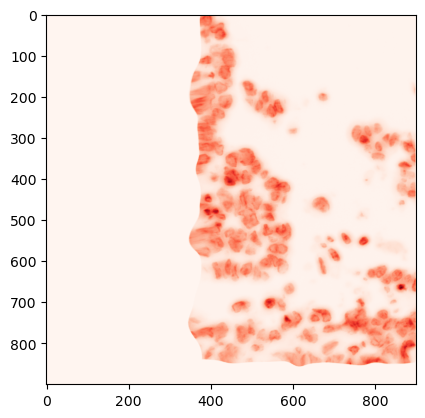

In [38]:
show_image(diffeo1)

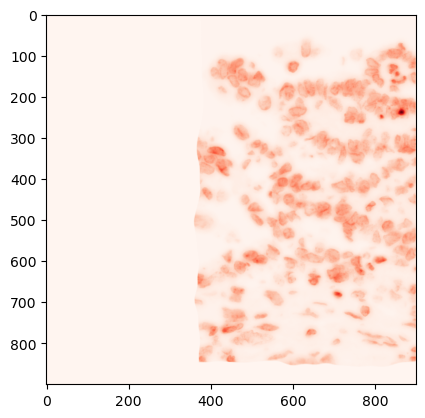

In [39]:
show_image(diffeo2)

In [3]:
from utils.image_mapping import compute_affine_mapping_cv2, apply_mapping

affine_mapping = compute_affine_mapping_cv2(fixed, mov)
reg = apply_mapping(affine_mapping, mov, method='cv2')[:, :, 2]

In [11]:
60000 * 60000

3600000000

In [12]:
6000 * 6000

36000000

In [10]:
fixed[:,:,0].size

35087796

2024-09-07 09:46:55,521 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-09-07 09:46:55,522 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-09-07 09:46:55,525 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2024-09-07 09:46:55,526 - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 0.33499999999999996
2024-09-07 09:46:55,527 - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda3/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymReg.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2024-09-07 09:46:55,527 - DEBUG - findfont: score(FontEntry(fname='/opt/miniconda

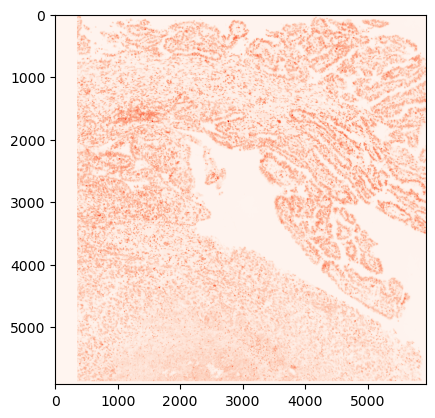

In [7]:
show_image(reg)

In [18]:
reg = tiff.imread('/Volumes/scratch/DIMA/chiodin/tests/img_reg_pipeline_3/data/output/image_registration/2024.09.01_DAPI_p53_CD3/785R1_DAPI_p53_CD3.ome.tiff')

In [19]:
reg.shape

(5916, 5931, 3)

In [1]:
impath = '/Volumes/techunits/imaging/work/ATTEND/achiodin/ome_tiff_images/2024.08.05_DAPI_CD8_CD4/1513901_DAPI_CD8_CD4.ome.tiff'

import tifffile

# Open the .tiff file and retrieve the shape
with tifffile.TiffFile(impath) as tif:
    image_shape = tif.pages[0].shape  # Get the shape of the first page
    print(image_shape)


(56360, 66744)


In [8]:
show_image(reg[:,:,2])

NameError: name 'reg' is not defined

In [3]:
print(img1.shape, img2.shape, img3.shape)

(3, 5916, 5968) (3, 5932, 5931) (3, 5969, 5995)


In [8]:
def crop_2d_array(array, crop_areas, crop_indices=None):
    """
    Crop a 2D NumPy array into specified areas.

    Parameters:
        array (np.ndarray): The input 2D array.
        crop_areas (tuple or list): A tuple or a list of tuples of four integers (start_row, end_row, start_col, end_col).
        crop_indices (list, optional): A list of indices corresponding to the crop areas.

    Returns:
        np.ndarray or list: The cropped 2D array or a list of cropped arrays (optionally with indices).
    """
    def crop_area(area):
        start_row, end_row, start_col, end_col = area
        return array[start_row:end_row, start_col:end_col]

    if isinstance(crop_areas, list):
        if crop_indices is None:
            return [crop_area(area) for area in crop_areas]
        else:
            return [(idx, crop_area(area)) for idx, area in zip(crop_indices, crop_areas)]
    else:
        return crop_area(crop_areas)


In [1]:
import tifffile as tiff
import numpy as np

def resize_tiff(input_path, output_path, crop_area):
    img = tiff.imread(input_path)
    img = np.transpose(img, (1, 2, 0))
    img = crop_2d_array(img, crop_areas=crop_area)

    tiff.imwrite(output_path,img)
    

In [9]:
path1 = '/Volumes/scratch/DIMA/chiodin/tests/img_reg_pipeline_3/data/output/image_conversion/2024.08.30_DAPI_PPARgamma_PDL1/bf_785R1_DAPI_PPARgamma_PDL1.ome.tiff'
path2 = '/Volumes/scratch/DIMA/chiodin/tests/img_reg_pipeline_3/data/output/image_conversion/2024.08.31_DAPI_PD1_SRSF3/bf_785R1_DAPI_PD1_SRSF3.ome.tiff'
path3 = '/Volumes/scratch/DIMA/chiodin/tests/img_reg_pipeline_3/data/output/image_conversion/2024.09.01_DAPI_p53_CD3/bf_785R1_DAPI_p53_CD3.ome.tiff'

opath1 = '/Volumes/scratch/DIMA/chiodin/tests/img_reg_pipeline_3/data/output/image_conversion/2024.08.30_DAPI_PPARgamma_PDL1/785R1_DAPI_PPARgamma_PDL1_2500.ome.tiff'
opath2 = '/Volumes/scratch/DIMA/chiodin/tests/img_reg_pipeline_3/data/output/image_conversion/2024.08.31_DAPI_PD1_SRSF3/785R1_DAPI_PD1_SRSF3_2500.ome.tiff'
opath3 = '/Volumes/scratch/DIMA/chiodin/tests/img_reg_pipeline_3/data/output/image_conversion/2024.09.01_DAPI_p53_CD3/785R1_DAPI_p53_CD3_2500.ome.tiff'

resize_tiff(path1, opath1, (0, 2500, 0, 2500))
resize_tiff(path2, opath2, (0, 2500, 0, 2500))
resize_tiff(path3, opath3, (0, 2500, 0, 2500))

KeyboardInterrupt: 

In [10]:
path1 = '/Volumes/scratch/DIMA/chiodin/tests/img_reg_pipeline_3/data/output/image_conversion/2024.08.30_DAPI_PPARgamma_PDL1/bf_785R1_DAPI_PPARgamma_PDL1.ome.tiff'
path2 = '/Volumes/scratch/DIMA/chiodin/tests/img_reg_pipeline_3/data/output/image_conversion/2024.08.31_DAPI_PD1_SRSF3/bf_785R1_DAPI_PD1_SRSF3.ome.tiff'
path3 = '/Volumes/scratch/DIMA/chiodin/tests/img_reg_pipeline_3/data/output/image_conversion/2024.09.01_DAPI_p53_CD3/bf_785R1_DAPI_p53_CD3.ome.tiff'

opath1 = '/Volumes/scratch/DIMA/chiodin/tests/img_reg_pipeline_3/data/output/image_conversion/2024.08.30_DAPI_PPARgamma_PDL1/785R1_DAPI_PPARgamma_PDL1_1000.ome.tiff'
opath2 = '/Volumes/scratch/DIMA/chiodin/tests/img_reg_pipeline_3/data/output/image_conversion/2024.08.31_DAPI_PD1_SRSF3/785R1_DAPI_PD1_SRSF3_1000.ome.tiff'
opath3 = '/Volumes/scratch/DIMA/chiodin/tests/img_reg_pipeline_3/data/output/image_conversion/2024.09.01_DAPI_p53_CD3/785R1_DAPI_p53_CD3_1000.ome.tiff'

resize_tiff(path1, opath1, (0, 1000, 0, 1000))
resize_tiff(path2, opath2, (0, 1000, 0, 1000))
resize_tiff(path3, opath3, (0, 1000, 0, 1000))

In [2]:
opath1 = '/Volumes/scratch/DIMA/chiodin/tests/img_reg_pipeline_3/data/output/image_conversion/2024.08.30_DAPI_PPARgamma_PDL1/785R1_DAPI_PPARgamma_PDL1_2500.ome.tiff'
opath2 = '/Volumes/scratch/DIMA/chiodin/tests/img_reg_pipeline_3/data/output/image_conversion/2024.08.31_DAPI_PD1_SRSF3/785R1_DAPI_PD1_SRSF3_2500.ome.tiff'
opath3 = '/Volumes/scratch/DIMA/chiodin/tests/img_reg_pipeline_3/data/output/image_conversion/2024.09.01_DAPI_p53_CD3/785R1_DAPI_p53_CD3_2500.ome.tiff'


i1 = tiff.imread(opath1)
i2 = tiff.imread(opath2)
i3 = tiff.imread(opath3)

In [3]:
print(i1.shape, i2.shape, i3.shape)

(2500, 2500, 3) (2500, 2500, 3) (2500, 2500, 3)


In [9]:
import os 

os.getcwd()

# os.chdir('/Volumes/scratch/DIMA/chiodin/repositories/image_registration_pipeline')

'/Volumes/scratch/DIMA/chiodin/repositories/image_registration_pipeline'

In [12]:
import tifffile as tiff
im = tiff.imread('/Volumes/scratch/DIMA/chiodin/tests/img_reg_pipeline_3/data/output/image_registration/2024.09.01_DAPI_p53_CD3/785R1_DAPI_p53_CD3.ome.tiff')

# im = tiff.imread('/Volumes/scratch/DIMA/chiodin/tests/img_reg_pipeline_3/data/output/image_conversion/2024.08.31_DAPI_PD1_SRSF3/785R1_DAPI_PD1_SRSF3.ome.tiff')

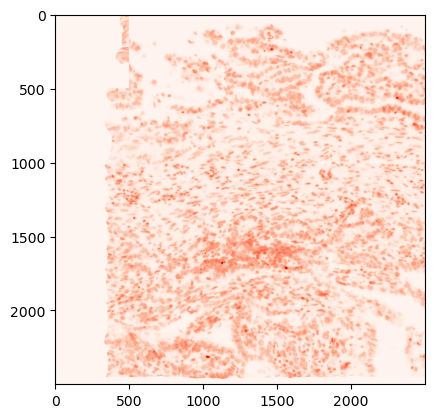

In [13]:
show_image(im[:,:,2])